In [14]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman
from modularity_maximization import partition

from modularity_maximization.utils import get_modularity
from networkx.algorithms.community import greedy_modularity_communities
from cdlib import algorithms
import pickle
import jgraph as igraph

In [21]:
import igraph as ig

DeprecationWarning: To avoid name collision with the igraph project, this visualization library has been renamed to 'jgraph'. Please upgrade when convenient.

# Performance Metric

* Betweenness > Girvan-Newman Algorithm

* Partition > Newman 
https://github.com/zhiyzuo/python-modularity-maximization/blob/master/modularity_maximization/community_newman.py
https://arxiv.org/abs/physics/0602124

* modularity_max greedy_modularity communities
Clauset-Newman-Moore greedy modularity maximization

# eigenvalue

In [11]:
print(list(set(eigen_dict.values()))) #참고

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


In [17]:
print(list(set(eigen_dict.items()))) #참고

[(13, 22), (93, 17), (24, 8), (29, 19), (3, 0), (82, 2), (115, 7), (10, 6), (95, 15), (130, 1), (37, 14), (19, 0), (18, 8), (41, 19), (8, 5), (100, 1), (108, 3), (116, 13), (50, 0), (9, 0), (118, 3), (31, 8), (127, 4), (91, 18), (48, 2), (92, 21), (137, 11), (139, 1), (30, 5), (131, 16), (107, 12), (132, 1), (113, 4), (122, 18), (71, 21), (26, 0), (62, 9), (38, 10), (103, 13), (141, 15), (55, 2), (28, 20), (44, 10), (90, 16), (54, 10), (117, 17), (22, 0), (20, 14), (6, 5), (119, 4), (32, 22), (76, 2), (84, 12), (86, 2), (125, 4), (66, 9), (36, 5), (83, 7), (96, 7), (111, 1), (123, 11), (134, 13), (46, 20), (33, 0), (126, 4), (11, 6)]


In [20]:
test = list(set(eigen_dict.items()))
print(test[:5])
print(len(test))

[(13, 22), (93, 17), (24, 8), (29, 19), (3, 0)]
66


dataset name ../edge_v3/edge_GRAPE_th95_v3.csv
Delete node with no neighborhood: [0, 1, 2, 4, 5, 7, 12, 14, 15, 16, 17, 21, 23, 25, 27, 34, 35, 39, 40, 42, 43, 45, 47, 49, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 81, 85, 87, 88, 89, 94, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 120, 121, 124, 128, 129, 133, 135, 136, 138, 140] 

Number of node: 66
{3: 1, 6: 5, 8: 5, 9: 1, 10: 6, 11: 6, 13: 18, 18: 8, 19: 1, 20: 12, 22: 1, 24: 8, 26: 1, 28: 15, 29: 16, 30: 5, 31: 8, 32: 18, 33: 1, 36: 5, 37: 12, 38: 13, 41: 16, 44: 13, 46: 15, 48: 4, 50: 1, 54: 13, 55: 4, 62: 14, 66: 14, 71: 17, 76: 4, 82: 4, 83: 7, 84: 9, 86: 4, 90: 21, 91: 19, 92: 17, 93: 20, 95: 22, 96: 7, 100: 0, 103: 11, 107: 9, 108: 3, 111: 0, 113: 2, 115: 7, 116: 11, 117: 20, 118: 3, 119: 2, 122: 19, 123: 10, 125: 2, 126: 2, 127: 2, 130: 0, 131: 21, 132: 0, 134: 11, 137: 10, 139: 0, 141: 22}
length of nodes: 23


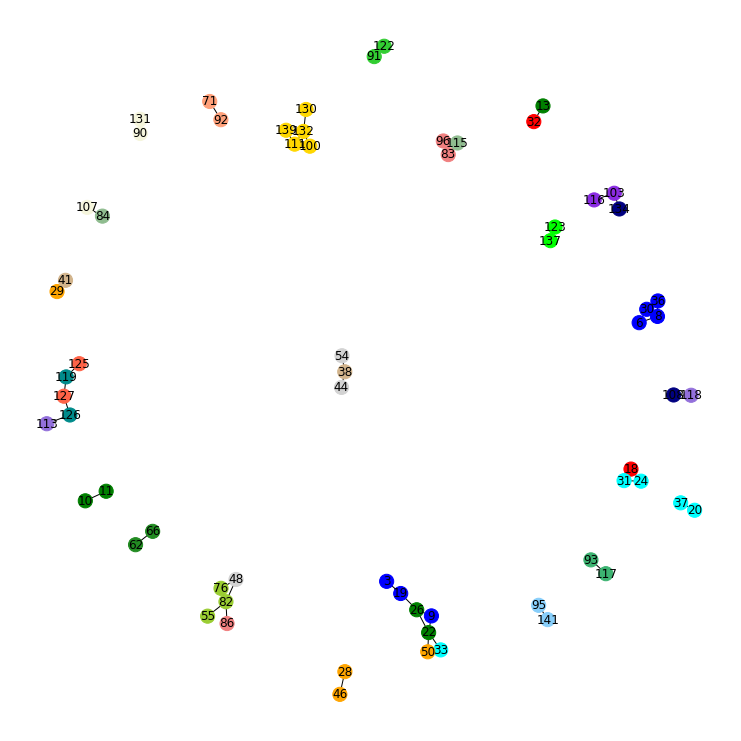

dataset name ../edge_v3/edge_original_th95_v3.csv
Delete node with no neighborhood: [14, 18, 22, 23, 25, 27, 34, 38, 39, 43, 45, 47, 49, 51, 52, 53, 57, 58, 61, 62, 71, 73, 74, 75, 77, 79, 81, 84, 87, 92, 94, 97, 99, 101, 105, 106, 107, 108, 114, 115, 128, 132, 133, 136, 138, 140] 

Number of node: 96
{0: 4, 1: 9, 2: 9, 3: 2, 4: 9, 5: 0, 6: 0, 7: 5, 8: 0, 9: 2, 10: 3, 11: 8, 12: 7, 13: 3, 15: 9, 16: 2, 17: 1, 19: 2, 20: 1, 21: 13, 24: 10, 26: 2, 28: 0, 29: 6, 30: 0, 31: 10, 32: 3, 33: 1, 35: 5, 36: 1, 37: 0, 40: 1, 41: 7, 42: 15, 44: 5, 46: 0, 48: 4, 50: 2, 54: 5, 55: 0, 56: 0, 59: 14, 60: 3, 63: 3, 64: 3, 65: 3, 66: 7, 67: 2, 68: 15, 69: 0, 70: 5, 72: 8, 76: 4, 78: 3, 80: 0, 82: 0, 83: 8, 85: 14, 86: 6, 88: 3, 89: 6, 90: 5, 91: 2, 93: 3, 95: 0, 96: 8, 98: 5, 100: 1, 102: 7, 103: 4, 104: 11, 109: 13, 110: 0, 111: 2, 112: 8, 113: 12, 116: 3, 117: 5, 118: 1, 119: 0, 120: 3, 121: 9, 122: 2, 123: 0, 124: 4, 125: 0, 126: 12, 127: 1, 129: 11, 130: 7, 131: 5, 134: 3, 135: 5, 137: 0, 139: 1, 1

<Figure size 432x288 with 0 Axes>

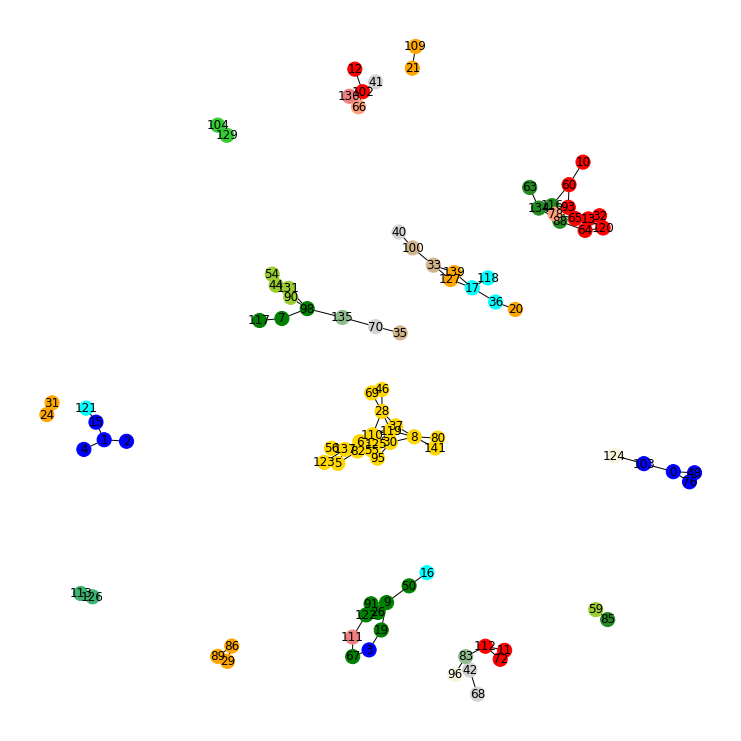

dataset name ../edge_v3/edge_mean_th95_v3.csv
Delete node with no neighborhood: [12, 14, 15, 16, 17, 18, 21, 23, 24, 25, 27, 31, 35, 40, 41, 42, 44, 45, 47, 49, 51, 52, 53, 54, 57, 60, 61, 63, 64, 65, 68, 71, 72, 73, 74, 77, 79, 80, 81, 84, 87, 88, 92, 93, 98, 99, 101, 103, 104, 105, 107, 109, 113, 116, 117, 122, 124, 128, 131, 133, 138, 140] 

Number of node: 80
{0: 5, 1: 10, 2: 12, 3: 11, 4: 3, 5: 1, 6: 2, 7: 3, 8: 4, 9: 0, 10: 8, 11: 8, 13: 3, 19: 11, 20: 6, 22: 0, 26: 0, 28: 1, 29: 0, 30: 4, 32: 1, 33: 0, 34: 12, 36: 4, 37: 4, 38: 3, 39: 2, 43: 0, 46: 5, 48: 2, 50: 0, 55: 2, 56: 2, 58: 4, 59: 10, 62: 1, 66: 0, 67: 0, 69: 1, 70: 3, 75: 4, 76: 2, 78: 3, 82: 2, 83: 9, 85: 10, 86: 1, 89: 11, 90: 3, 91: 0, 94: 5, 95: 2, 96: 9, 97: 10, 100: 0, 102: 4, 106: 1, 108: 7, 110: 4, 111: 1, 112: 10, 114: 3, 115: 9, 118: 7, 119: 1, 120: 3, 121: 3, 123: 1, 125: 2, 126: 0, 127: 1, 129: 6, 130: 0, 132: 0, 134: 8, 135: 3, 136: 5, 137: 1, 139: 1, 141: 2}
length of nodes: 13


<Figure size 432x288 with 0 Axes>

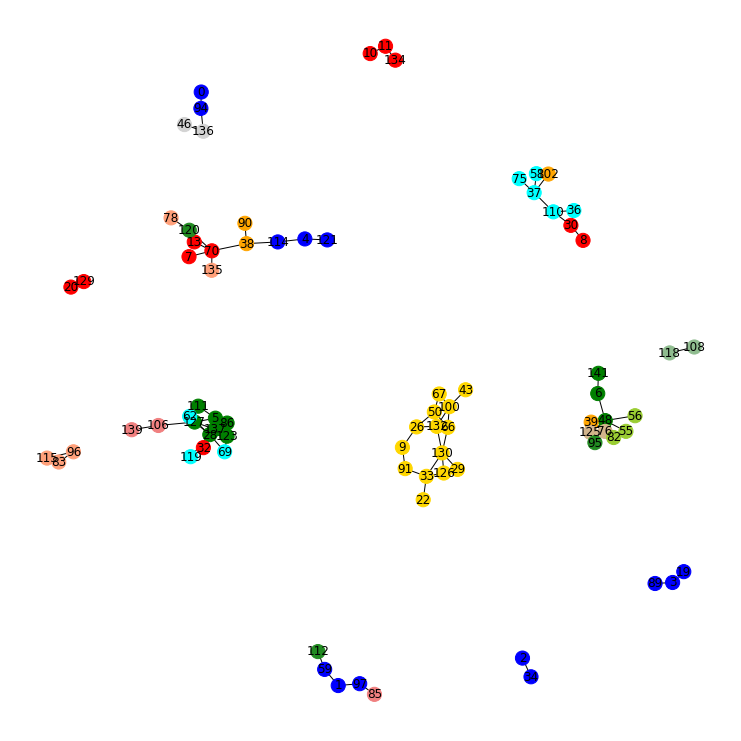

dataset name ../edge_v3/edge_mice_th95_v3.csv
Delete node with no neighborhood: [0, 1, 2, 3, 4, 7, 8, 12, 13, 15, 16, 19, 20, 21, 22, 23, 25, 27, 30, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 115, 117, 119, 120, 121, 125, 126, 128, 129, 131, 133, 134, 135, 136, 138] 

Number of node: 37
{5: 7, 6: 1, 9: 1, 10: 2, 11: 2, 14: 11, 17: 11, 18: 5, 24: 6, 26: 5, 28: 7, 29: 3, 31: 6, 32: 7, 33: 5, 36: 3, 50: 5, 76: 4, 82: 4, 86: 4, 89: 4, 100: 0, 103: 8, 107: 9, 108: 10, 111: 0, 113: 9, 116: 8, 118: 10, 122: 0, 123: 0, 124: 8, 127: 0, 130: 0, 132: 0, 137: 0, 139: 0}
length of nodes: 12


<Figure size 432x288 with 0 Axes>

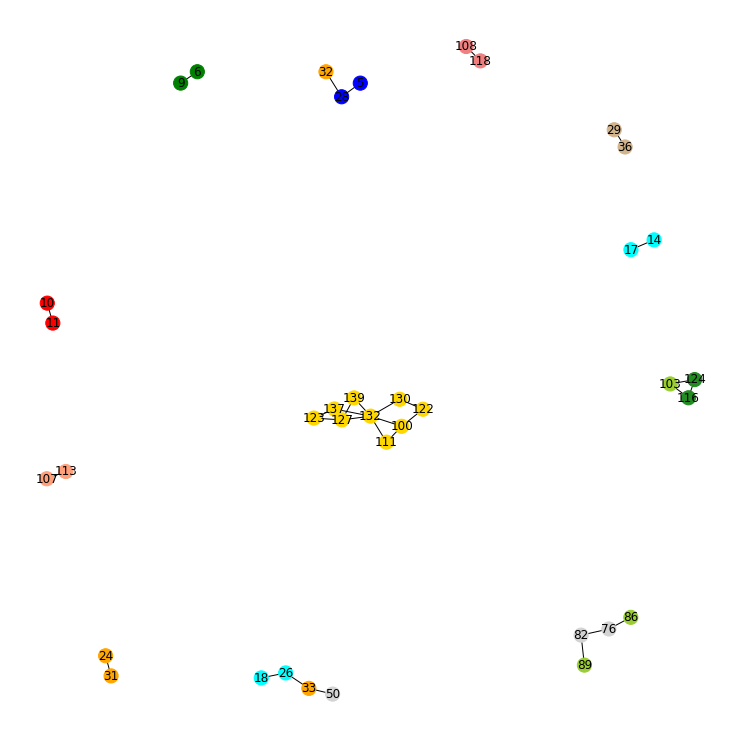

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

# import data
grape_dataset = '../edge_v3/edge_GRAPE_th95_v3.csv' 
original_dataset = '../edge_v3/edge_original_th95_v3.csv'
mean_dataset = '../edge_v3/edge_mean_th95_v3.csv'
mice_dataset = '../edge_v3/edge_mice_th95_v3.csv'

dataset_list = [grape_dataset, original_dataset, mean_dataset, mice_dataset]


for d in dataset_list:
    plt.figure(figsize=(10,10))
    print(f'dataset name {d}')
    df = pd.read_csv(d, index_col =0, dtype='int64')
    df = df.rename(columns={'0':'dst', '1':'src'})

    # define edge_list (u,v)
    edge_list = list(df.itertuples(index=False, name=None))

    # define node_list
    node_list = [x for x in range(max(df['dst']))]

    # Create Graph 
    G = nx.Graph()

    # Add node and edge to graph
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)

    # Delete node which does not have neighborhood
    print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
    G.remove_nodes_from(list(nx.isolates(G)))
    print('Number of node:',len(G.nodes))

    # community detection with betweenness
    eigen_dict = partition(G)
    
    #print('eigen_dict')
    #print(eigen_dict.items())
    eigen_values = list(set(eigen_dict.values()))

    for key in eigen_dict.keys():
        if eigen_dict[key] in eigen_values:
            eigen_dict[key] = eigen_values.index(eigen_dict[key])
    
    print(eigen_dict)
    
    node_groups = []
    for com in list(set(eigen_dict.values())): # community
        com_node = []
        for tup in list(set(eigen_dict.items())):
            if tup[1]==com:
                com_node.append(tup[0]) # key
        node_groups.append(com_node)
        
    #print("node group!!!!!!!!!!!")
    #print(node_groups)
    ''' 파티션 결과
    print(eigen_dict)
    - Key:데이터 인덱스
    - Value: community
    '''        
    
    #communities = girvan_newman(G, most_valuable_edge=most_central_edge)
    #print(communities)
    
    #node_groups = []
    #for com in next(communities):
    #    node_groups.append(list(com))
    
    #node_groups = communities
    
    new_edge = []
    for k in edge_list:
        for g in range(len(node_groups)):
            for i in node_groups[g]:
                for j in node_groups[g]:
                    # print(k)
                    # print((i,j))
                    if k == (i,j):
                        # print((i,j))
                        new_edge.append((i,j))

    G2 = nx.Graph()
    print(f'length of nodes: {len(node_groups)}')
    for i, node in enumerate(node_groups):
        # print(node)
        G2.add_nodes_from(node)
        G2.add_edges_from(new_edge)

    color_map = []

    for i, node in enumerate(node_groups):
        if i == 1:
            color_map.extend(['blue']*len(node))
        elif i == 2:
            color_map.extend(['green']*len(node))  
        elif i == 3:
            color_map.extend(['red']*len(node))
        elif i == 4:
            color_map.extend(['cyan']*len(node))

        elif i == 5:
            color_map.extend(['orange']*len(node))
        elif i == 6:
            color_map.extend(['tan']*len(node))
        elif i == 7:
            color_map.extend(['lightgray']*len(node))
        elif i == 8:
            color_map.extend(['yellowgreen']*len(node))
        elif i == 9:
            color_map.extend(['forestgreen']*len(node))
        elif i == 10:
            color_map.extend(['lightsalmon']*len(node))
        elif i == 11:
            color_map.extend(['lightcoral']*len(node))
        elif i == 12:
            color_map.extend(['darkseagreen']*len(node))
        elif i == 13:
            color_map.extend(['beige']*len(node))
        elif i == 14:
            color_map.extend(['limegreen']*len(node))
        elif i == 15:
            color_map.extend(['mediumseagreen']*len(node))
        elif i == 16:
            color_map.extend(['lightskyblue']*len(node))
        elif i == 17:
            color_map.extend(['blueviolet']*len(node))
        elif i == 18:
            color_map.extend(['navy']*len(node))
        elif i ==19:
            color_map.extend(['mediumpurple']*len(node))
        elif i == 20:
            color_map.extend(['darkcyan']*len(node))
        elif i == 21:
            color_map.extend(['tomato']*len(node))
        elif i == 22:
            color_map.extend(['lime']*len(node))
        elif i == 23:
            color_map.extend(['brown']*len(node))
        else: 
            color_map.extend(['gold']*len(node))

    nx.spring_layout(G2, scale=0.5)
    nx.draw(G2,  node_color=color_map, with_labels=True, node_size = 200)
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('original.png', dpi=300)

# Greedy

dataset name ../edge_v3/edge_GRAPE_th95_v3.csv
Delete node with no neighborhood: [0, 1, 2, 4, 5, 7, 12, 14, 15, 16, 17, 21, 23, 25, 27, 34, 35, 39, 40, 42, 43, 45, 47, 49, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 81, 85, 87, 88, 89, 94, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 120, 121, 124, 128, 129, 133, 135, 136, 138, 140] 

Number of node: 66
[frozenset({33, 3, 9, 50, 19, 22, 26}), frozenset({76, 48, 82, 86, 55}), frozenset({113, 119, 125, 126, 127}), frozenset({130, 132, 100, 139, 111}), frozenset({8, 36, 6, 30}), frozenset({24, 18, 31}), frozenset({38, 44, 54}), frozenset({96, 83, 115}), frozenset({116, 134, 103}), frozenset({10, 11}), frozenset({32, 13}), frozenset({20, 37}), frozenset({41, 29}), frozenset({28, 46}), frozenset({66, 62}), frozenset({92, 71}), frozenset({107, 84}), frozenset({117, 93}), frozenset({108, 118}), frozenset({122, 91}), frozenset({90, 131}), frozenset({137, 123}), frozenset({141, 95}

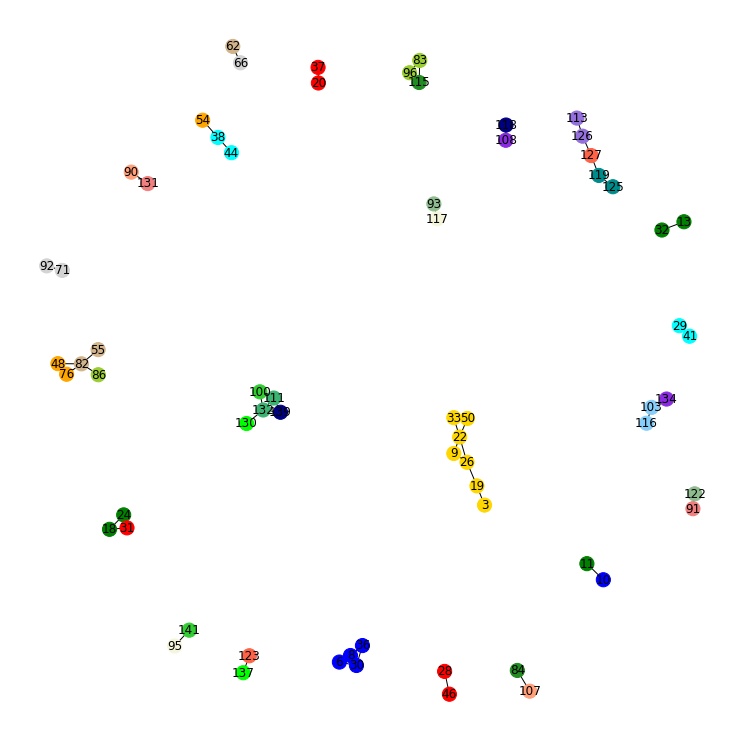

dataset name ../edge_v3/edge_original_th95_v3.csv
Delete node with no neighborhood: [14, 18, 22, 23, 25, 27, 34, 38, 39, 43, 45, 47, 49, 51, 52, 53, 57, 58, 61, 62, 71, 73, 74, 75, 77, 79, 81, 84, 87, 92, 94, 97, 99, 101, 105, 106, 107, 108, 114, 115, 128, 132, 133, 136, 138, 140] 

Number of node: 96
[frozenset({37, 6, 69, 8, 141, 110, 46, 80, 82, 55, 119, 56, 28, 125, 30, 95}), frozenset({64, 65, 32, 134, 10, 13, 78, 116, 120, 88, 60, 93, 63}), frozenset({3, 67, 26, 9, 111, 16, 50, 19, 122, 91}), frozenset({98, 131, 35, 70, 7, 135, 44, 117, 54, 90}), frozenset({33, 36, 139, 17, 20, 118, 127}), frozenset({96, 72, 11, 112, 83}), frozenset({1, 2, 4, 15, 121}), frozenset({0, 103, 76, 48, 124}), frozenset({130, 66, 102, 41, 12}), frozenset({100, 5, 40, 137, 123}), frozenset({89, 29, 86}), frozenset({24, 31}), frozenset({42, 68}), frozenset({59, 85}), frozenset({109, 21}), frozenset({113, 126}), frozenset({104, 129})]
length of nodes: 17


<Figure size 432x288 with 0 Axes>

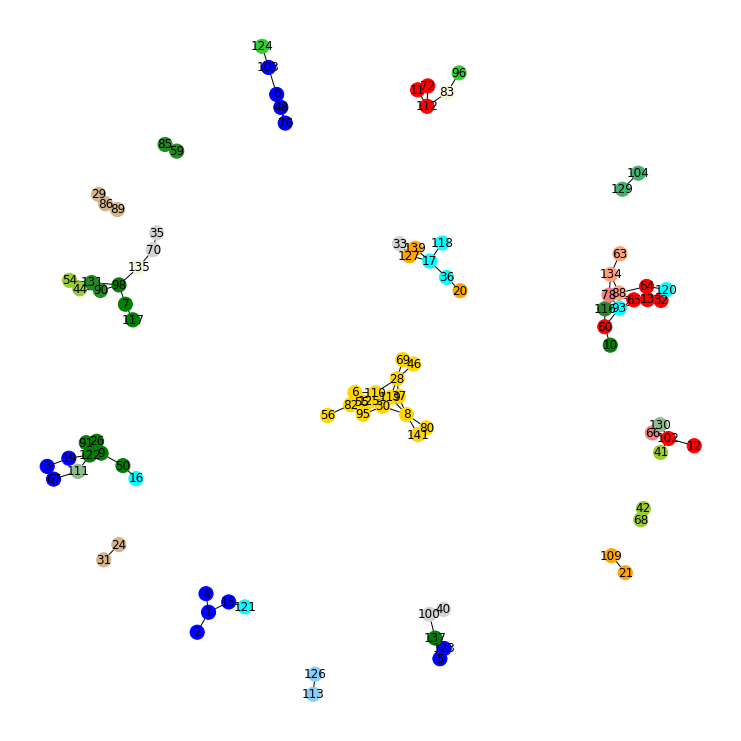

dataset name ../edge_v3/edge_mean_th95_v3.csv
Delete node with no neighborhood: [12, 14, 15, 16, 17, 18, 21, 23, 24, 25, 27, 31, 35, 40, 41, 42, 44, 45, 47, 49, 51, 52, 53, 54, 57, 60, 61, 63, 64, 65, 68, 71, 72, 73, 74, 77, 79, 80, 81, 84, 87, 88, 92, 93, 98, 99, 101, 103, 104, 105, 107, 109, 113, 116, 117, 122, 124, 128, 131, 133, 138, 140] 

Number of node: 80
[frozenset({33, 66, 67, 130, 132, 100, 9, 43, 50, 22, 26, 91, 29, 126}), frozenset({32, 69, 5, 6, 137, 106, 139, 141, 111, 86, 123, 28, 62, 127}), frozenset({4, 70, 7, 135, 38, 13, 78, 114, 120, 121, 90}), frozenset({0, 36, 8, 136, 110, 46, 30, 119, 94}), frozenset({39, 76, 48, 82, 55, 56, 125, 95}), frozenset({1, 97, 112, 85, 59}), frozenset({58, 75, 37, 102}), frozenset({19, 89, 3}), frozenset({96, 83, 115}), frozenset({10, 11, 134}), frozenset({2, 34}), frozenset({108, 118}), frozenset({129, 20})]
length of nodes: 13


<Figure size 432x288 with 0 Axes>

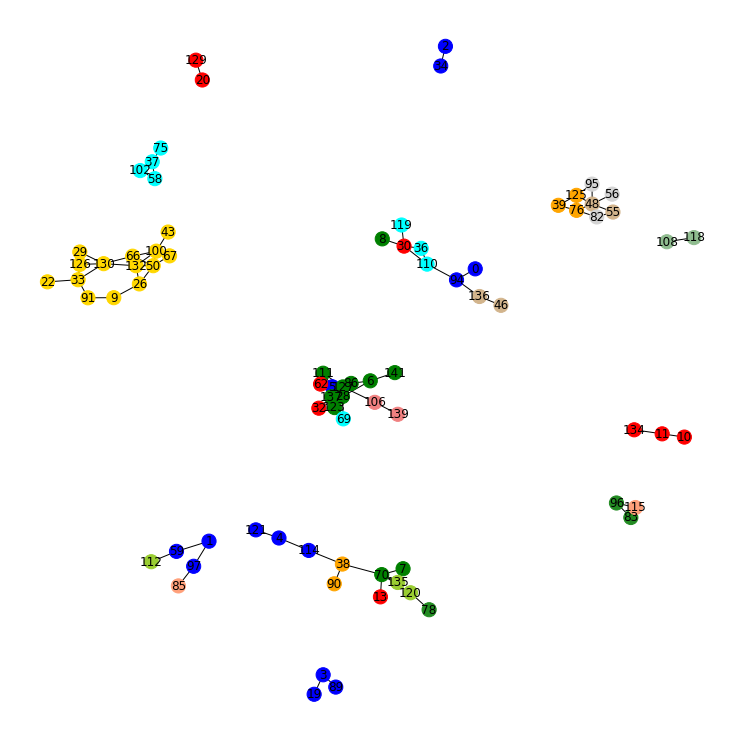

dataset name ../edge_v3/edge_mice_th95_v3.csv
Delete node with no neighborhood: [0, 1, 2, 3, 4, 7, 8, 12, 13, 15, 16, 19, 20, 21, 22, 23, 25, 27, 30, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 115, 117, 119, 120, 121, 125, 126, 128, 129, 131, 133, 134, 135, 136, 138] 

Number of node: 37
[frozenset({130, 132, 100, 137, 139, 111, 122, 123, 127}), frozenset({18, 33, 50, 26}), frozenset({89, 82, 76, 86}), frozenset({32, 28, 5}), frozenset({124, 116, 103}), frozenset({9, 6}), frozenset({10, 11}), frozenset({17, 14}), frozenset({24, 31}), frozenset({36, 29}), frozenset({113, 107}), frozenset({108, 118})]
length of nodes: 12


<Figure size 432x288 with 0 Axes>

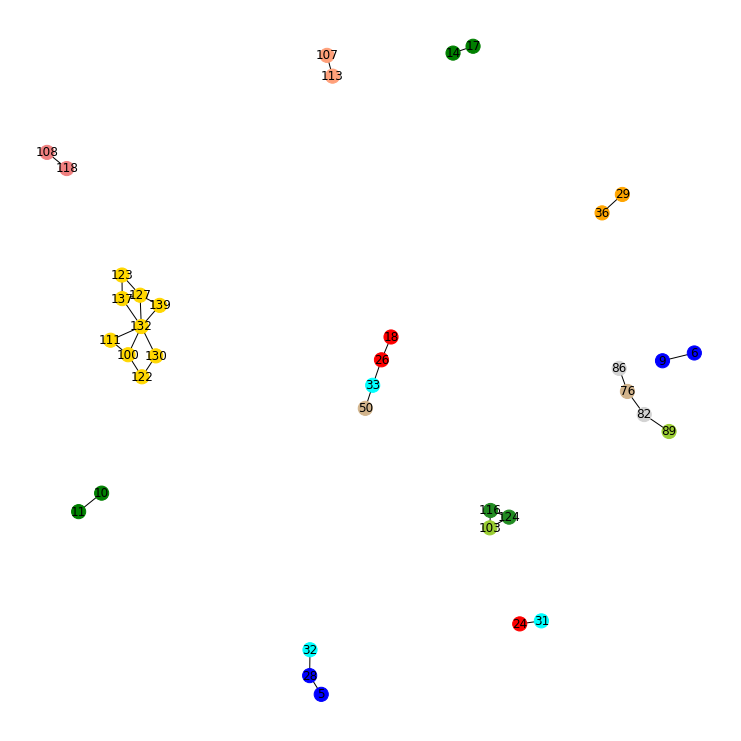

<Figure size 432x288 with 0 Axes>

In [19]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

# import data
grape_dataset = '../edge_v3/edge_GRAPE_th95_v3.csv' 
original_dataset = '../edge_v3/edge_original_th95_v3.csv'
mean_dataset = '../edge_v3/edge_mean_th95_v3.csv'
mice_dataset = '../edge_v3/edge_mice_th95_v3.csv'

dataset_list = [grape_dataset, original_dataset, mean_dataset, mice_dataset]


for d in dataset_list:
    plt.figure(figsize=(10,10))
    print(f'dataset name {d}')
    df = pd.read_csv(d, index_col =0, dtype='int64')
    df = df.rename(columns={'0':'dst', '1':'src'})

    # define edge_list (u,v)
    edge_list = list(df.itertuples(index=False, name=None))

    # define node_list
    node_list = [x for x in range(max(df['dst']))]

    # Create Graph 
    G = nx.Graph()

    # Add node and edge to graph
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)

    # Delete node which does not have neighborhood
    print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
    G.remove_nodes_from(list(nx.isolates(G)))
    print('Number of node:',len(G.nodes))

    # community detection with betweenness
    communities = nx.algorithms.community.greedy_modularity_communities(G)
    #communities = girvan_newman(G, most_valuable_edge=most_central_edge)
    print(communities)
    
    #node_groups = []
    #for com in next(communities):
    #    node_groups.append(list(com))
    
    node_groups = communities
    
    new_edge = []
    for k in edge_list:
        for g in range(len(node_groups)):
            for i in node_groups[g]:
                for j in node_groups[g]:
                    # print(k)
                    # print((i,j))
                    if k == (i,j):
                        # print((i,j))
                        new_edge.append((i,j))

    G2 = nx.Graph()
    print(f'length of nodes: {len(node_groups)}')
    for i, node in enumerate(node_groups):
        # print(node)
        G2.add_nodes_from(node)
        G2.add_edges_from(new_edge)

    color_map = []

    for i, node in enumerate(node_groups):
        if i == 1:
            color_map.extend(['blue']*len(node))
        elif i == 2:
            color_map.extend(['green']*len(node))  
        elif i == 3:
            color_map.extend(['red']*len(node))
        elif i == 4:
            color_map.extend(['cyan']*len(node))

        elif i == 5:
            color_map.extend(['orange']*len(node))
        elif i == 6:
            color_map.extend(['tan']*len(node))
        elif i == 7:
            color_map.extend(['lightgray']*len(node))
        elif i == 8:
            color_map.extend(['yellowgreen']*len(node))
        elif i == 9:
            color_map.extend(['forestgreen']*len(node))
        elif i == 10:
            color_map.extend(['lightsalmon']*len(node))
        elif i == 11:
            color_map.extend(['lightcoral']*len(node))
        elif i == 12:
            color_map.extend(['darkseagreen']*len(node))
        elif i == 13:
            color_map.extend(['beige']*len(node))
        elif i == 14:
            color_map.extend(['limegreen']*len(node))
        elif i == 15:
            color_map.extend(['mediumseagreen']*len(node))
        elif i == 16:
            color_map.extend(['lightskyblue']*len(node))
        elif i == 17:
            color_map.extend(['blueviolet']*len(node))
        elif i == 18:
            color_map.extend(['navy']*len(node))
        elif i ==19:
            color_map.extend(['mediumpurple']*len(node))
        elif i == 20:
            color_map.extend(['darkcyan']*len(node))
        elif i == 21:
            color_map.extend(['tomato']*len(node))
        elif i == 22:
            color_map.extend(['lime']*len(node))
        elif i == 23:
            color_map.extend(['brown']*len(node))
        else: 
            color_map.extend(['gold']*len(node))

    
    nx.spring_layout(G2, scale=0.5)
    nx.draw(G2,  node_color=color_map, with_labels=True, node_size = 200)
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('greedy-original.png', dpi=300)

# walktrap

In [20]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

# import data
grape_dataset = '../edge_v3/edge_GRAPE_th95_v3.csv' 
original_dataset = '../edge_v3/edge_original_th95_v3.csv'
mean_dataset = '../edge_v3/edge_mean_th95_v3.csv'
mice_dataset = '../edge_v3/edge_mice_th95_v3.csv'

dataset_list = [grape_dataset, original_dataset, mean_dataset, mice_dataset]


for d in dataset_list:
    plt.figure(figsize=(10,10))
    print(f'dataset name {d}')
    df = pd.read_csv(d, index_col =0, dtype='int64')
    df = df.rename(columns={'0':'dst', '1':'src'})

    # define edge_list (u,v)
    edge_list = list(df.itertuples(index=False, name=None))

    # define node_list
    node_list = [x for x in range(max(df['dst']))]

    # Create Graph 
    G = nx.Graph()

    # Add node and edge to graph
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)

    # Delete node which does not have neighborhood
    print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
    G.remove_nodes_from(list(nx.isolates(G)))
    print('Number of node:',len(G.nodes))

    # community detection with betweenness
    walktrap = algorithms.walktrap(G)
    communities=walktrap.communities
    #print(communities)
    
    node_groups = communities
    #node_groups = []
    #for com in next(communities):
    #    node_groups.append(list(com))

    new_edge = []
    for k in edge_list:
        for g in range(len(node_groups)):
            for i in node_groups[g]:
                for j in node_groups[g]:
                    # print(k)
                    # print((i,j))
                    if k == (i,j):
                        # print((i,j))
                        new_edge.append((i,j))

    G2 = nx.Graph()
    print(f'length of nodes: {len(node_groups)}')
    for i, node in enumerate(node_groups):
        # print(node)
        G2.add_nodes_from(node)
        G2.add_edges_from(new_edge)

    color_map = []

    for i, node in enumerate(node_groups):
        if i == 1:
            color_map.extend(['blue']*len(node))
        elif i == 2:
            color_map.extend(['green']*len(node))  
        elif i == 3:
            color_map.extend(['red']*len(node))
        elif i == 4:
            color_map.extend(['cyan']*len(node))

        elif i == 5:
            color_map.extend(['orange']*len(node))
        elif i == 6:
            color_map.extend(['tan']*len(node))
        elif i == 7:
            color_map.extend(['lightgray']*len(node))
        elif i == 8:
            color_map.extend(['yellowgreen']*len(node))
        elif i == 9:
            color_map.extend(['forestgreen']*len(node))
        elif i == 10:
            color_map.extend(['lightsalmon']*len(node))
        elif i == 11:
            color_map.extend(['lightcoral']*len(node))
        elif i == 12:
            color_map.extend(['darkseagreen']*len(node))
        elif i == 13:
            color_map.extend(['beige']*len(node))
        elif i == 14:
            color_map.extend(['limegreen']*len(node))
        elif i == 15:
            color_map.extend(['mediumseagreen']*len(node))
        elif i == 16:
            color_map.extend(['lightskyblue']*len(node))
        elif i == 17:
            color_map.extend(['blueviolet']*len(node))
        elif i == 18:
            color_map.extend(['navy']*len(node))
        elif i ==19:
            color_map.extend(['mediumpurple']*len(node))
        elif i == 20:
            color_map.extend(['darkcyan']*len(node))
        elif i == 21:
            color_map.extend(['tomato']*len(node))
        elif i == 22:
            color_map.extend(['lime']*len(node))
        elif i == 23:
            color_map.extend(['brown']*len(node))
        else: 
            color_map.extend(['gold']*len(node))

    nx.spring_layout(G2, scale=0.5)
    nx.draw(G2,  node_color=color_map, with_labels=True, node_size = 200)
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('walktrap-original.png', dpi=300)


dataset name ../edge_v3/edge_GRAPE_th95_v3.csv
Delete node with no neighborhood: [0, 1, 2, 4, 5, 7, 12, 14, 15, 16, 17, 21, 23, 25, 27, 34, 35, 39, 40, 42, 43, 45, 47, 49, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 81, 85, 87, 88, 89, 94, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 120, 121, 124, 128, 129, 133, 135, 136, 138, 140] 

Number of node: 66


ModuleNotFoundError: Optional dependency not satisfied: install igraph to use the selected feature.

<Figure size 720x720 with 0 Axes>

# girvan_newman

dataset name ../edge_v3/edge_GRAPE_th95_v3.csv
Delete node with no neighborhood: [0, 1, 2, 4, 5, 7, 12, 14, 15, 16, 17, 21, 23, 25, 27, 34, 35, 39, 40, 42, 43, 45, 47, 49, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 81, 85, 87, 88, 89, 94, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 120, 121, 124, 128, 129, 133, 135, 136, 138, 140] 

Number of node: 66
length of nodes: 24


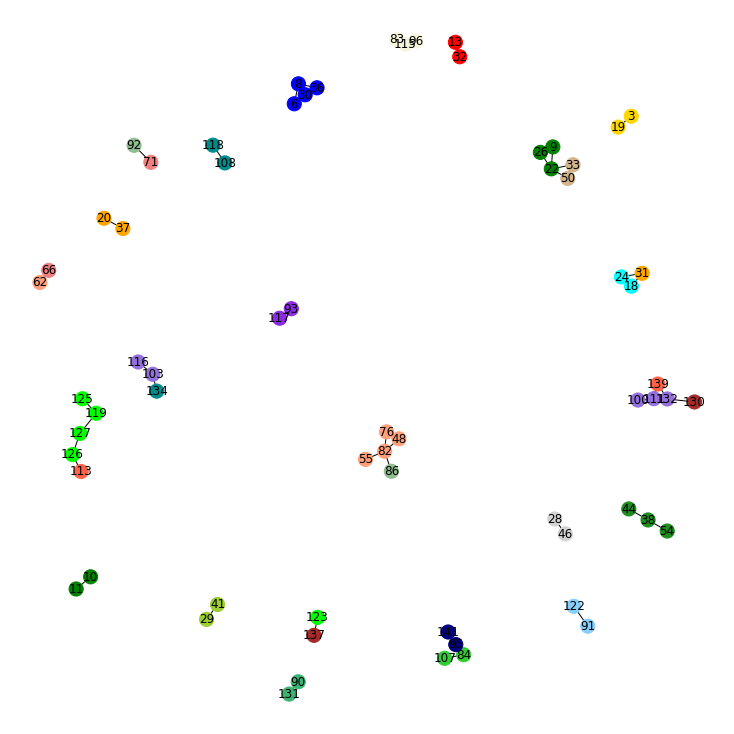

dataset name ../edge_v3/edge_original_th95_v3.csv
Delete node with no neighborhood: [14, 18, 22, 23, 25, 27, 34, 38, 39, 43, 45, 47, 49, 51, 52, 53, 57, 58, 61, 62, 71, 73, 74, 75, 77, 79, 81, 84, 87, 92, 94, 97, 99, 101, 105, 106, 107, 108, 114, 115, 128, 132, 133, 136, 138, 140] 

Number of node: 96
length of nodes: 14


<Figure size 432x288 with 0 Axes>

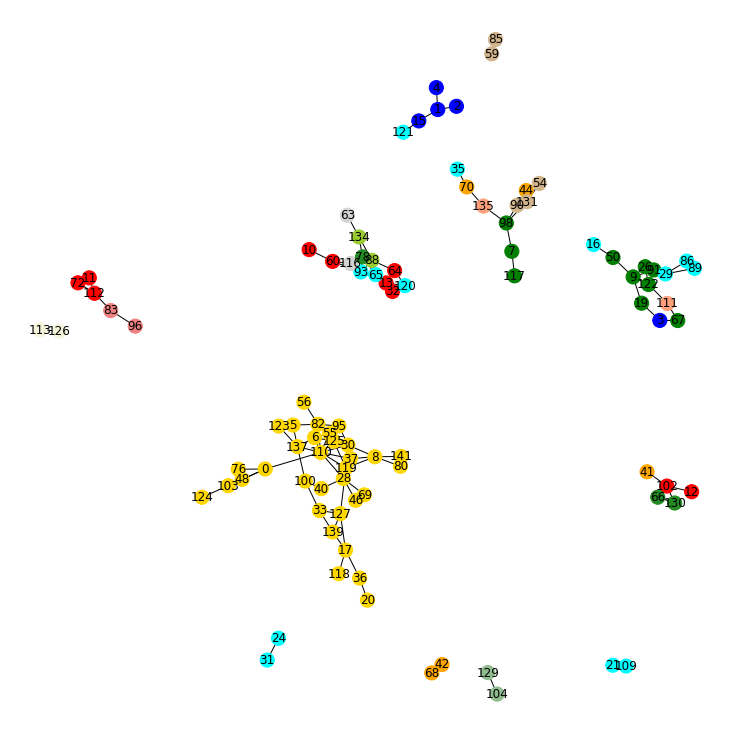

dataset name ../edge_v3/edge_mean_th95_v3.csv
Delete node with no neighborhood: [12, 14, 15, 16, 17, 18, 21, 23, 24, 25, 27, 31, 35, 40, 41, 42, 44, 45, 47, 49, 51, 52, 53, 54, 57, 60, 61, 63, 64, 65, 68, 71, 72, 73, 74, 77, 79, 80, 81, 84, 87, 88, 92, 93, 98, 99, 101, 103, 104, 105, 107, 109, 113, 116, 117, 122, 124, 128, 131, 133, 138, 140] 

Number of node: 80
length of nodes: 10


<Figure size 432x288 with 0 Axes>

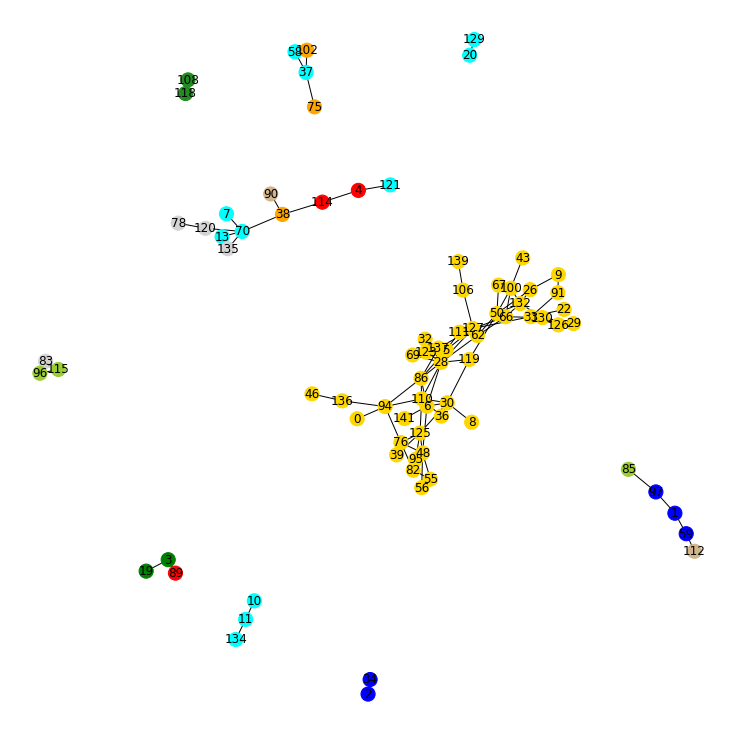

dataset name ../edge_v3/edge_mice_th95_v3.csv
Delete node with no neighborhood: [0, 1, 2, 3, 4, 7, 8, 12, 13, 15, 16, 19, 20, 21, 22, 23, 25, 27, 30, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 115, 117, 119, 120, 121, 125, 126, 128, 129, 131, 133, 134, 135, 136, 138] 

Number of node: 37
length of nodes: 13


<Figure size 432x288 with 0 Axes>

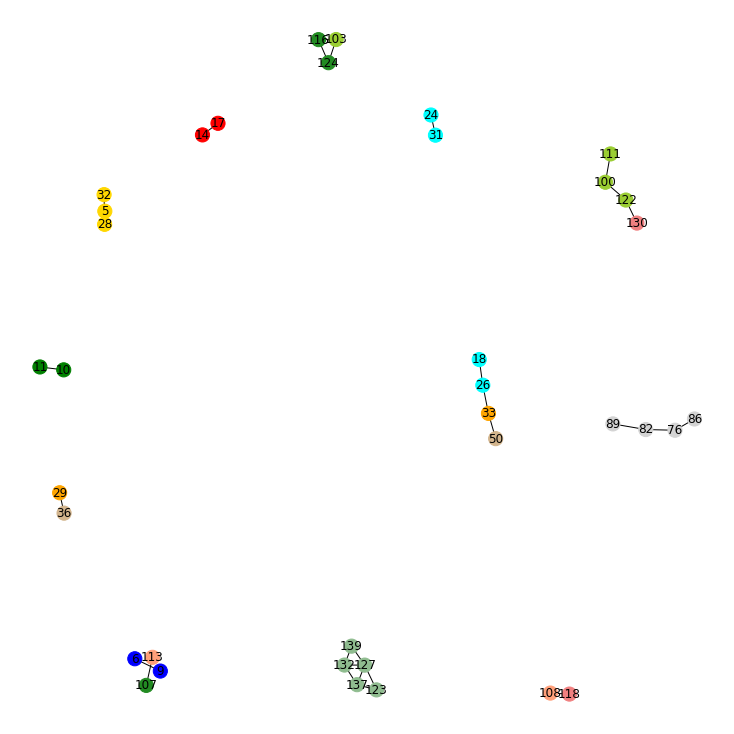

<Figure size 432x288 with 0 Axes>

In [15]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

# import data
grape_dataset = '../edge_v3/edge_GRAPE_th95_v3.csv' 
original_dataset = '../edge_v3/edge_original_th95_v3.csv'
mean_dataset = '../edge_v3/edge_mean_th95_v3.csv'
mice_dataset = '../edge_v3/edge_mice_th95_v3.csv'

dataset_list = [grape_dataset, original_dataset, mean_dataset, mice_dataset]


for d in dataset_list:
    plt.figure(figsize=(10,10))
    print(f'dataset name {d}')
    df = pd.read_csv(d, index_col =0, dtype='int64')
    df = df.rename(columns={'0':'dst', '1':'src'})

    # define edge_list (u,v)
    edge_list = list(df.itertuples(index=False, name=None))

    # define node_list
    node_list = [x for x in range(max(df['dst']))]

    # Create Graph 
    G = nx.Graph()

    # Add node and edge to graph
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)

    # Delete node which does not have neighborhood
    print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
    G.remove_nodes_from(list(nx.isolates(G)))
    print('Number of node:',len(G.nodes))

    # community detection with betweenness
    communities = girvan_newman(G, most_valuable_edge=most_central_edge)
    
    node_groups = []
    for com in next(communities):
        #print(com)
        node_groups.append(list(com))
    
    #print(node_groups)
    
    new_edge = []
    for k in edge_list:
        for g in range(len(node_groups)):
            for i in node_groups[g]:
                for j in node_groups[g]:
                    # print(k)
                    # print((i,j))
                    if k == (i,j):
                        # print((i,j))
                        new_edge.append((i,j))

    G2 = nx.Graph()
    print(f'length of nodes: {len(node_groups)}')
    for i, node in enumerate(node_groups):
        # print(node)
        G2.add_nodes_from(node)
        G2.add_edges_from(new_edge)

    color_map = []

    for i, node in enumerate(node_groups):
        if i == 1:
            color_map.extend(['blue']*len(node))
        elif i == 2:
            color_map.extend(['green']*len(node))  
        elif i == 3:
            color_map.extend(['red']*len(node))
        elif i == 4:
            color_map.extend(['cyan']*len(node))

        elif i == 5:
            color_map.extend(['orange']*len(node))
        elif i == 6:
            color_map.extend(['tan']*len(node))
        elif i == 7:
            color_map.extend(['lightgray']*len(node))
        elif i == 8:
            color_map.extend(['yellowgreen']*len(node))
        elif i == 9:
            color_map.extend(['forestgreen']*len(node))
        elif i == 10:
            color_map.extend(['lightsalmon']*len(node))
        elif i == 11:
            color_map.extend(['lightcoral']*len(node))
        elif i == 12:
            color_map.extend(['darkseagreen']*len(node))
        elif i == 13:
            color_map.extend(['beige']*len(node))
        elif i == 14:
            color_map.extend(['limegreen']*len(node))
        elif i == 15:
            color_map.extend(['mediumseagreen']*len(node))
        elif i == 16:
            color_map.extend(['lightskyblue']*len(node))
        elif i == 17:
            color_map.extend(['blueviolet']*len(node))
        elif i == 18:
            color_map.extend(['navy']*len(node))
        elif i ==19:
            color_map.extend(['mediumpurple']*len(node))
        elif i == 20:
            color_map.extend(['darkcyan']*len(node))
        elif i == 21:
            color_map.extend(['tomato']*len(node))
        elif i == 22:
            color_map.extend(['lime']*len(node))
        elif i == 23:
            color_map.extend(['brown']*len(node))
        else: 
            color_map.extend(['gold']*len(node))

    nx.spring_layout(G2, scale=0.5)
    nx.draw(G2,  node_color=color_map, with_labels=True, node_size = 200)
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('girvan_newman-original.png', dpi=300)


In [2]:
# define edge_list (u,v)
edge_list = list(df.itertuples(index=False, name=None))

# define node_list
node_list = [x for x in range(max(df['dst']))]

In [3]:
# Create Graph 
G = nx.Graph()

# Add node and edge to graph
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

# Delete node which does not have neighborhood
print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
G.remove_nodes_from(list(nx.isolates(G)))
print('Number of node:',len(G.nodes))

Delete node with no neighborhood: [38, 45, 51, 53, 57, 61, 73, 74, 77] 

Number of node: 133


In [6]:
# criterion for most valuable edge (can be changed)
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    # print(centrality)
    return max(centrality, key=centrality.get)

In [7]:
most_central_edge(G)

(19, 26)

In [6]:
# community detection with betweenness
communities = girvan_newman(G, most_valuable_edge=most_central_edge)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

"""
# visualize original graph
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, scale=4)
nx.draw(G, pos, node_color=range(len(G.nodes)), node_size=500, with_labels=True, cmap=plt.cm.Blues)
plt.title('Community Detection with betweenness')
plt.show()
"""
# plt.savefig('betweenness.jpg')

"\n# visualize original graph\nplt.figure(figsize=(10,10))\npos = nx.spring_layout(G, scale=4)\nnx.draw(G, pos, node_color=range(len(G.nodes)), node_size=500, with_labels=True, cmap=plt.cm.Blues)\nplt.title('Community Detection with betweenness')\nplt.show()\n"

In [7]:
new_edge = []
for k in edge_list:
    for g in range(len(node_groups)):
        for i in node_groups[g]:
            for j in node_groups[g]:
                # print(k)
                # print((i,j))
                if k == (i,j):
                    # print((i,j))
                    new_edge.append((i,j))

In [8]:
# # visualize original graph
# plt.figure(figsize=(10,10))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, node_size=500, with_labels=True, cmap=plt.cm.Blues)
# plt.title('Community Detection with betweenness')
# plt.show()

In [9]:
G2 = nx.Graph()

for i, node in enumerate(node_groups):
    # print(node)
    G2.add_nodes_from(node)
    G2.add_edges_from(new_edge)


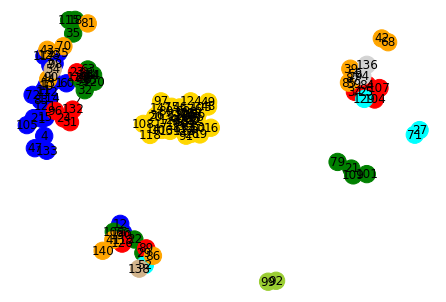

<Figure size 432x288 with 0 Axes>

In [12]:
# plt.figure(figsize=(10,10))
color_map = []

for i, node in enumerate(node_groups):
    if i == 1:
        color_map.extend(['blue']*len(node))
    elif i == 2:
        color_map.extend(['green']*len(node))  
    elif i == 3:
        color_map.extend(['red']*len(node))
    elif i == 4:
        color_map.extend(['cyan']*len(node))

    elif i == 5:
        color_map.extend(['orange']*len(node))
    elif i == 6:
        color_map.extend(['tan']*len(node))
    elif i == 7:
        color_map.extend(['lightgray']*len(node))
    elif i == 8:
        color_map.extend(['yellowgreen']*len(node))
    elif i == 9:
        color_map.extend(['forestgreen']*len(node))
    elif i == 10:
        color_map.extend(['lightsalmon']*len(node))
    elif i == 11:
        color_map.extend(['lightcoral']*len(node))

    else: 
        color_map.extend(['gold']*len(node))

nx.draw(G2,  node_color=color_map, with_labels=True, node_size = 300)
plt.show()
plt.savefig('original.jpg', dpi=300)

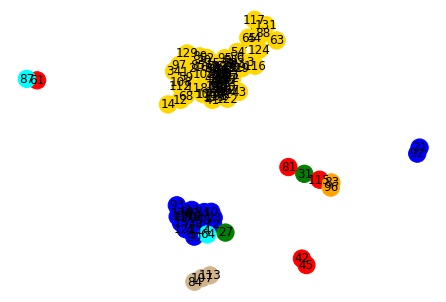

In [12]:
# mean
nx.draw(G2,  node_color=color_map, with_labels=True, node_size = 300)
plt.show()
# plt.savefig('original.png')

In [61]:
# import matplotlib.pyplot as plt
# # create number for each group to allow use of colormap
# from itertools import count
# # get unique groups
# groups = set(nx.get_node_attributes(G2,'group').values())
# mapping = dict(zip(sorted(groups),count()))
# nodes = G2.nodes()
# colors = [mapping[G2.nodes[n]['group']] for n in nodes]
# print(colors)

# # drawing nodes and edges separately so we can capture collection for colobar
# pos = nx.spring_layout(G2)
# ec = nx.draw_networkx_edges(G2, pos, alpha=0.2)
# nc = nx.draw_networkx_nodes(G2, pos, nodelist=nodes, node_color=colors, 
#                             with_labels=False, node_size=100, cmap=plt.cm.jet)
# plt.colorbar(nc)
# plt.axis('off')
# plt.show()

In [63]:
# plt.scatter([x for x in range(len(node_groups[0]))],node_groups[0])
# # plt.scatter([x for x in range(len(node_groups[1]))],node_groups[1], color='r')
# plt.scatter([x for x in range(len(node_groups[2]))],node_groups[2], color='yellow')